Trần Hoàn Đức Duy - 19521434

In [ ]:
%cd /content/drive/MyDrive/Programming/Python for machine learning

/content/drive/MyDrive/Programming/Python for machine learning


#Bước 1: Đọc dữ liệu từ file .csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds = pd.read_csv('data/Social_Network_Ads.csv')
ds.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


#Bước 2: Phân chia dữ liệu thành tập train và tập test theo tỉ lệ 8:2

In [ ]:
X, y = ds.iloc[:,:-1],ds.iloc[:,-1]
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [ ]:
def plot(X,y):
  pos = y==1
  nev = y==0
  plt.scatter(X[pos,0],X[pos,1],marker='o',color = 'red')
  plt.scatter(X[nev,0],X[nev,1],marker='v')
  plt.show()

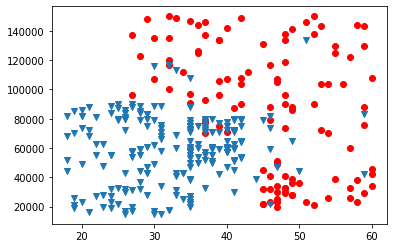

In [ ]:
plot(X_train.to_numpy(),y_train.to_numpy())

#Bước 3: Chuẩn hóa dữ liệu

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

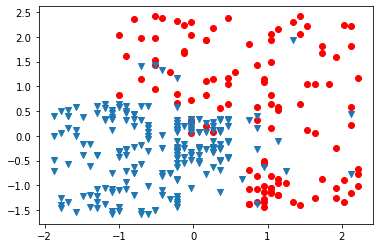

In [ ]:
plot(X_train, y_train)

#Bước 4: Khởi tạo và huấn luyện các mô hình Bước 5: Infer và đánh giá mô hình với độ đo accuracy Bước 6: (bonus) trực quan hóa kết quả của mô hình vừa huấn luyện

In [ ]:
def accuracies(model):
  print('Train accuracy: {}'.format(model.score(X_train,y_train)))
  print('Val accuracy: {}'.format(model.score(X_val,y_val)))

In [ ]:
def model_visualization(model):
  x_min, x_max = -4,4
  y_min, y_max = -4,4
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  plt.contourf(xx,yy,Z,alpha = 0.4)
  plot(X_val,y_val)

In [ ]:
def model_evaluation(model):
  accuracies(model)
  model_visualization(model)

##Logistic repression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression().fit(X_train,y_train)

Train accuracy: 0.84375
Val accuracy: 0.8375


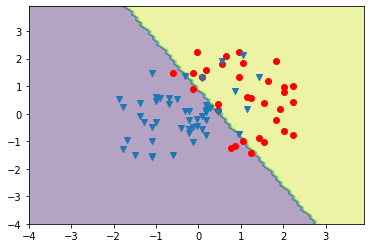

In [ ]:
model_evaluation(model_LR)

##K-Nearest Neighbor

Train accuracy: 0.94375
Val accuracy: 0.875


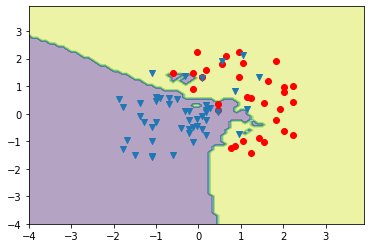

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train,y_train)
model_evaluation(model_KNN)

##SVM

Train accuracy: 0.846875
Val accuracy: 0.8375


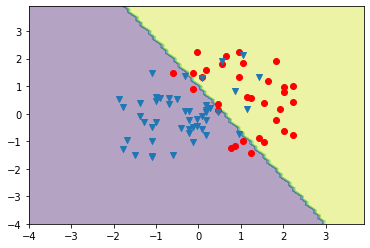

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'linear')
model_SVC.fit(X_train,y_train)
model_evaluation(model_SVC)

##SVM with RBF kernel

Train accuracy: 0.925
Val accuracy: 0.8625


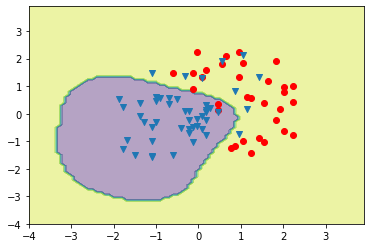

In [ ]:
from sklearn.svm import SVC
model_SVC_RBF = SVC(kernel = 'rbf')
model_SVC_RBF.fit(X_train,y_train)
model_evaluation(model_SVC_RBF)

##Naive Bayes

Train accuracy: 0.90625
Val accuracy: 0.85


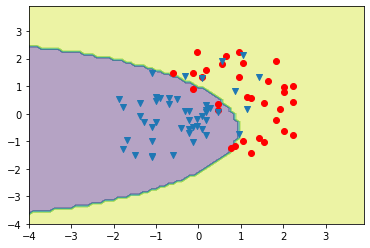

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB().fit(X_train,y_train)
model_evaluation(model_NB)

##Decision tree

Train accuracy: 0.996875
Val accuracy: 0.8


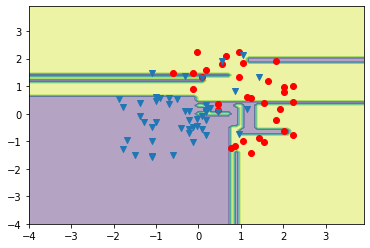

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier().fit(X_train,y_train)
model_evaluation(model_DT)

##Random Forest

Train accuracy: 0.990625
Val accuracy: 0.8375


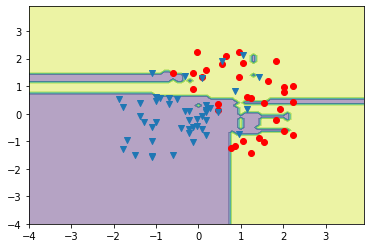

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 10).fit(X_train,y_train)
model_evaluation(model_RF)

#Bài tập: sử dụng K-fold cross-validation để đánh giá các mô hình nói trên

In [ ]:
from sklearn.model_selection import KFold
def evaluation_kfold(model):
  X, y = ds.iloc[:,:-1].to_numpy(),ds.iloc[:,-1].to_numpy()
  kf = KFold(n_splits=5)
  train_accuracies = []
  val_accuracies = []
  for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_val = scaler.transform(X_val)
    
    model.fit(X_train,y_train)

    train_accuracies.append(model.score(X_train,y_train))
    val_accuracies.append(model.score(X_val,y_val))
  
  print('Train accuracy: ',np.mean(train_accuracies))
  print('Validation accuracy: ',np.mean(val_accuracies))

In [ ]:
models = [LogisticRegression(),KNeighborsClassifier(n_neighbors = 3),SVC(kernel = 'linear'),SVC(kernel = 'rbf'),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators = 10)]
model_names = ['Logistic Repression','K-Nearest Neighbor','SVM','SVM with RBF kernel','Naive Bayes','Decision tree','Random Forest']
for name,model in zip(model_names,models):
  print(name,':')
  evaluation_kfold(model)
  print('-'*10)

Logistic Repression :
Train accuracy:  0.853125
Validation accuracy:  0.8225
----------
K-Nearest Neighbor :
Train accuracy:  0.930625
Validation accuracy:  0.8924999999999998
----------
SVM :
Train accuracy:  0.8556250000000001
Validation accuracy:  0.82
----------
SVM with RBF kernel :
Train accuracy:  0.91375
Validation accuracy:  0.9099999999999999
----------
Naive Bayes :
Train accuracy:  0.8943749999999999
Validation accuracy:  0.8574999999999999
----------
Decision tree :
Train accuracy:  0.9962500000000001
Validation accuracy:  0.8549999999999999
----------
Random Forest :
Train accuracy:  0.985
Validation accuracy:  0.875
----------
